In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

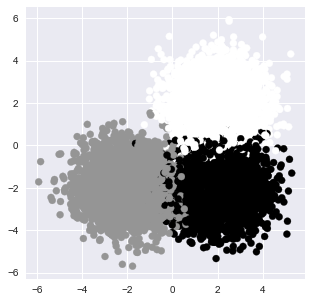

In [84]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.7, 
     random_state=42)

In [85]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


In [86]:
labels

array([0, 0, 2, ..., 2, 0, 0])

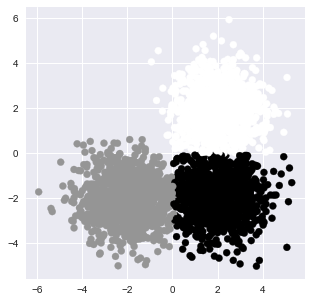

Comparing the assigned categories to the ones in the train data:
col_0    0    1    2
row_0               
0      989    0   20
1        1  987   20
2       18   25  940


In [87]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the train data:')
print(pd.crosstab(y_train,labels))

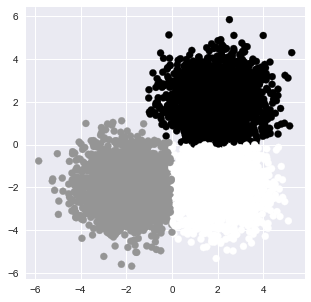

Comparing the assigned categories to the ones in the test data:
col_0     0     1     2
row_0                  
0        61     3  2261
1        54  2266     5
2      2244    59    47


In [96]:
bandwidth = estimate_bandwidth(X_test, quantile=0.2, n_samples=500)

# Extract cluster assignments for each data point.
labels = ms.predict(X_test)


plt.scatter(X_test[:, 0], X_test[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the test data:')
print(pd.crosstab(y_test,labels))

In [97]:
# We can compare this to the centers we created of our blobs
cluster_centers

array([[ 2.03754718,  1.92326695],
       [-1.85782623, -1.9818481 ],
       [ 1.95977958, -1.90461967]])

In [11]:
# Question: Why does the curriculum say "not bad at all"? The crosstab results look pretty poor.
# Question: When we fit our model, did the values of X_train change? It looks like no, but then, why did the scatterplot shape change?
# Question: Why did we define "cluster_centers" if we don't use it?

In [12]:
X_train.shape

(3000, 2)

In [13]:
X_test.shape

(7000, 2)

In [14]:
#application 

In [15]:
import numpy as np
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12

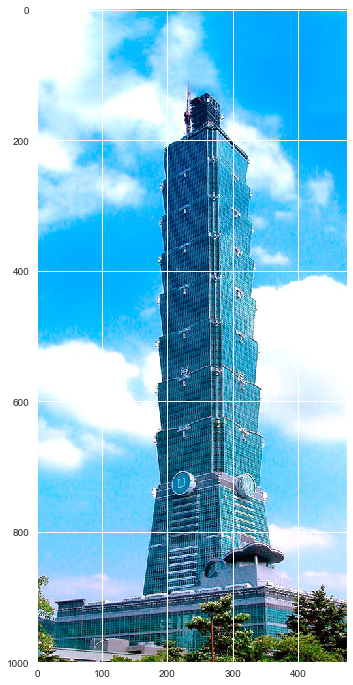

In [18]:
#image transformation 

image = Image.open('taipei101.jpg')

# Image is (687 x 1025, RGB channels)
image = np.array(image)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

plt.imshow(image)

In [19]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)

33.3062577282


In [20]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X) 

MeanShift(bandwidth=33.306257728190374, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [21]:
labels = ms.labels_
print(labels.shape)
cluster_centers = ms.cluster_centers_
print(cluster_centers.shape)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

(475000,)
(7, 3)
number of estimated clusters : 7


In [22]:
segmented_image = np.reshape(labels, original_shape[:2])  

(-0.5, 474.5, 999.5, -0.5)

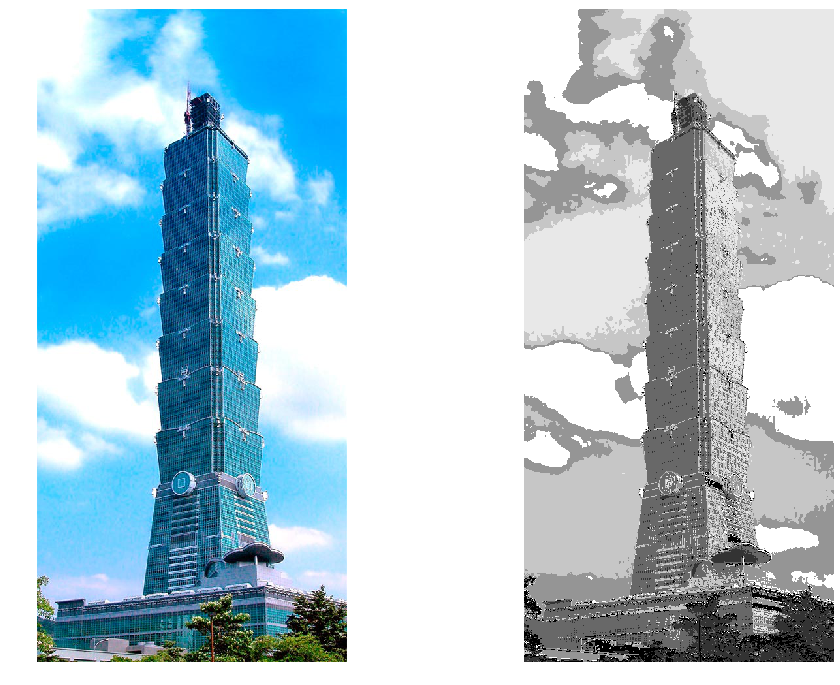

In [23]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')

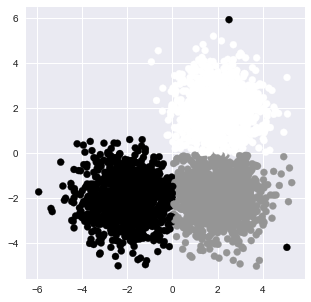

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      990   18    1
1        1   21  986
2       19  938   26


In [24]:
pylab.rcParams['figure.figsize'] = 5, 5
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
#sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [25]:
#Question: Why do we first use fit and then fit_predict?

In [26]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 1016


In [27]:
for k, col in zip(range(n_clusters_), colors): 

    class_members = labels == k
    print class_members 
    cluster_center = X_train[cluster_centers_indices[k]]
    print cluster_center 
    plt.plot(X_train[class_members, 0], X_train[class_members, 1],  col + '.')
    plt.plot(cluster_center[0], cluster_center[1],'o', markerfacecolor=col, markeredgecolor='k',markersize=10)


NameError: name 'colors' is not defined

In [ ]:
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]

    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)


plt.show()

In [ ]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

In [ ]:
# Question: What is this doing? "for k, col in zip(range(n_clusters_), colors):" and what does the "colors cycle" do?
# Question: Let's go over the above code together. I'd like to understand how the graph is generated.

# DRILL

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [ ]:
# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=5000,
    centers=centers,
    cluster_std=.5,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

In [ ]:
# PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Normalize the data.
X_norm = normalize(X_train)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [ ]:
# MeanShift

bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
labels = ms.labels_

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

In [ ]:
# SpectralClustering
sc = SpectralClustering(n_clusters=3)
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

In [ ]:
# Affinity propagation

af = AffinityPropagation().fit(X_train)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()
